In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import warnings
warnings.filterwarnings("ignore")
import pickle
from collections import OrderedDict
sys.path.append(os.pardir) 

# 2. 퍼셉트론

퍼셉트론은 다수의 신호를 입력으로, 하나의 신호를 출력으로 하는 알고리즘이다. 딥러닝의 기반이 되는 알고리즘이기도 하다. 가중치 $w$를 고려하며, 임계값 $\theta$를 넘을 때 신호가 1을 출력하고 넘지 않을 때는 0을 출력한다.


<div>
<img src="fig2.1.jpg" width="500"/>
</div>

<div>
<img src="equ2.1.jpg" width="500"/>
</div>

## 2.2 단순 논리 회로 (AND, NAND, OR)

논리 회로에는 AND, NAND, OR 게이트가 있다. 단순히 이야기하자면, AND는 $y=1$을 조건으로 $x_1$과 $x_2$의 교집합, OR는 합집합, NAND는 AND의 반대 게이트 역할을 한다. 게이트마다 가능한 $w_1$, $w_2$, $\theta$ 조합은 무한하다.

e.g.
- AND: $x_1 = 0$, $x_2 = 1$, then $y = 0$
- NAND: $x_1 = 1$, $x_2 = 1$, then $y = 0$
- OR: $x_1 = 1$, $x_2 = 0$, then $y = 1$

In [1]:
# AND gate

def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


<div>
<img src="equ2.2.jpg" width="500"/>
</div>

여기서는 임계값 대신 편향 $b$를 사용했다. 입력 신호에 가중치를 곱한 값과 편향을 합하여 0 이상이면 1을, 그렇지 않다면 0을 출력한다.

In [3]:
x = np.array([0, 1])
w = np.array([0.5, 0.5])
b = -0.7

print(w*x)
print(np.sum(w*x))
print(np.sum(w*x)+b)

[0.  0.5]
0.5
-0.19999999999999996


**가중치 $w$는 입력 신호가 결과에 주는 영향력을 조절**하는 매개변수고, **편향 $b$는 뉴런이 얼마나 쉽게 활성화(1 출력)되는지 조정**하는 매개변수다.

In [11]:
# AND gate using bias

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [9]:
# NAND gate using bias

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # Note that w is reversed
    b = 0.7                    # Note that b is reversed
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [7]:
# OR gate using bias

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) # Note that w is different
    b = -0.2                 # Note that b is different
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계

XOR 게이트는 배타적 논리합으로, $x_1$과 $x_2$ 중 하나가 1일 때만 1을 출력한다. 하나의 퍼셉트론으로 구분할 수 없는 이유는 그림으로 설명 가능하다.

<div>
<img src="fig2.2.jpg" width="500"/>
</div>

퍼셉트론은 직선 하나로 영역을 나누는데, XOR 게이트는 그림에서 보이듯 곡선으로만 영역을 나눌 수 있다. 따라서 비선형 영역이기에 하나의 퍼셉트론으로는 구현할 수 없다.

이와 같은 논리 회로를 구현하려면 층을 쌓아 **다층 퍼셉트론**을 구현한다:

1. $x_1$과 $x_2$를 NAND 게이트로 입력시킨다.
2. $x_1$과 $x_2$를 OR 게이트로 입력시킨다. (1과 독립적으로)
3. NAND 출력값과 OR 출력값을 AND 게이트로 입력시킨다.

<div>
<img src="fig2.3.jpg" width="500"/>
</div>

In [12]:
# XOR gate

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print(XOR(0, 0))
print(XOR(1, 0))
print(XOR(0, 1))
print(XOR(0, 0))

0
1
1
0


## Takeaways:

- 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
- 퍼셉트론에서는 *가중치*와 *편향*을 매개변수로 설정한다.
- 퍼셉트론으로 AND, NAND, OR 게이트 등의 논리 회로를 표현할 수 있다.
- XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다. 2층 퍼셉트론으로 표현할 수 있다.
- 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다. (다층 퍼셉트론은 이론상 컴퓨터도 표현 가능하다.)

# 3. 신경망

퍼셉트론으로 복잡한 함수도 표현이 가능하나, 단점은 가중치 설정은 여전히 수동으로 해야 한다는 점이다. 신경망의 경우 해당 단점이 개선된다.

## 3.1 신경망의 개념

<div>
<img src="fig3.1.jpg" width="500"/>
</div>

신경망의 형태는 퍼셉트론과 다르지 않으나, 신호를 보내는 방식이 다양해진다. 편향을 사용했던 퍼셉트론 공식을 다음과 같이 다른 형태로 바꿔 쓸 수 있다.

<div>
<img src="equ3.1.jpg" width="500"/>
</div>

여기서 h(x)를 **활성화 함수**라 칭하며, 해당 함수는 **입력 신호의 총합이 활성화를 일으키는지 판단**한다. 시각화하면 다음과 같이 표현할 수 있다.

<div>
<img src="equ3.2.jpg" width="500"/>
</div>

<div>
<img src="fig3.2.jpg" width="500"/>
</div>

## 3.2 활성화 함수

퍼셉트론에서는 활성화 함수를 **계단 함수**로 사용한다.

In [17]:
def step_function(x):
    return np.array(x>0, dtype=int)

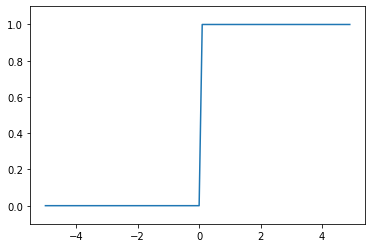

In [18]:
# visualize step function

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

신경망에서는 **시그모이드 함수**를 자주 사용한다.

<div>
<img src="equ3.3.jpg" width="500"/>
</div>

In [19]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

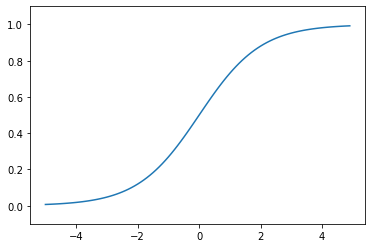

In [20]:
# visualize sigmoid function

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

계단 함수와 시그모이드 함수는 **매끄러움**에서 차이가 있다. 즉, 시그모이드 함수를 사용하는 신경망에서는 계단 함수를 사용하는 퍼셉트론과는 다르게 출력이 연속적으로 변화하며 연속적인 실수가 흐른다.

한편 중요한 공통점도 있는데, 두 함수 모두 *비선형 함수*다. **신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.** 선형 함수를 사용한다면 층을 더한다고 하더라도 은닉층이 없는 네트워크로 표현할 수 있기 때문에, 여러 층으로 구성하는 의미가 없기 때문이다.

e.g. $h(x) = cx$, then 3rd-layer $y(x) = h(h(h(x))) = c^3 * x$

한편, 최근에는 주로 ReLU 함수가 활성화 함수로 사용된다.

<div>
<img src="equ3.4.jpg" width="500"/>
</div>

In [21]:
def relu(x):
    return np.maximum(0, x)

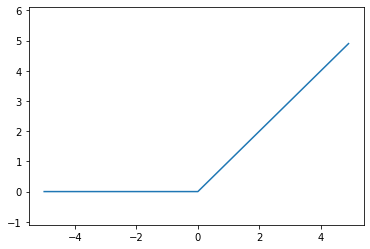

In [24]:
# visualize ReLU function

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.1, 6.1)
plt.show()

3층 신경망의 경우 **$A = XW + B$**, 즉 다음 그림과 같이 구현한다.

<div>
<img src="fig3.3.jpg" width="500"/>
</div>

첫 두 층 동안은 내적 곱과 이전에 언급했던 활성화 함수(시그모이드)를 사용하며, 출력층에서는 다른 활성화 함수를 사용한다. 출력층에서 사용하는 활성화 함수는 항등 함수이며, **항등 함수는 입력을 그대로 출력하는 함수**다.

In [26]:
def identity_function(x):
    return x

<div>
<img src="fig3.4.jpg" width="500"/>
</div>

In [27]:
# 3-layer neural net

# make weight and bias default and save it in a dictionary
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

# forward neural net
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계

신경망은 분류와 회귀에 모두 사용 가능하며, 분류에 사용되는 출력층 활성화 함수와 회귀에 사용되는 출력층 활성화 함수가 다르다. **회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용**한다. 소프트맥스 함수는 다음과 같다. ($n$은 출력층의 뉴런 수, $y_k$는 $k$번째 출력)

<div>
<img src="equ3.5.jpg" width="500"/>
</div>

<div>
<img src="fig3.5.jpg" width="500"/>
</div>

In [18]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))

[0.01821127 0.24519181 0.73659691]


소프트맥스 함수는 오버플로 문제에 취약하다. 지수 함수의 결과값은 기하급수적으로 커지기 때문에 임의의 정수 $C$를 분자와 분모에 곱해준다.

<div>
<img src="equ3.6.jpg" width="500"/>
</div>

즉, **소프트맥스의 지수 함수를 계산할 때 정수를 더하는 것은 결과에 영향을 미치지 않는다**. 보편적으로 *$C'$의 값은 입력 신호의 최댓값으로 설정*한다.

In [30]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # fix overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

a = np.array([1010, 1000, 990])
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


소프트맥스 함수의 출력은 $[0, 1]$의 범위를 가지며, **출력의 총합은 1**이다. 덕분에 소프트맥스 함수의 출력을 확률로 해석 가능하다.

## 3.6 손글씨 숫자 인식 (실전)

**분류 문제에서 출력층의 뉴런 수는 분류하려는 클래스 수와 같도록 한다.**

학습된 매개변수를 사용하여 추론하는 과정을 신경망의 **순전파**라고 한다.

In [34]:
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# print the shape of each data
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


구현은 이전과 거의 흡사하다.

In [37]:
from common.functions import sigmoid, softmax

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


# read weights and bias from sample_weight.pkl
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

정확도 계산을 위해 확률이 가장 높은 원소의 인덱스를 분류 레이블로 지정 후 대조한다.

In [39]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


1차원 배열을 입력하면 다음과 같은 배열 형상을 보인다.

<div>
<img src="fig3.6.jpg" width="500"/>
</div>

여러 장, 다시 말해 고차원의 배열을 입력할 때 입력 데이터를 한 번에 묶어 처리한다면 출력 데이터도 한 번에 받을 수 있게 된다. 하나로 묶은 입력 데이터를 **배치**라고 한다. 배치 처리는 다음과 같은 형상을 보인다.

<div>
<img src="fig3.7.jpg" width="500"/>
</div>

In [40]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] # batch 길이만큼 잘라서 입력
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


데이터를 배치로 처리한다면 더 효율적이고 빠르게 처리할 수 있다.

## Takeaways:

- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수로 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.

# 4. 신경망 학습

신경망 **학습**이란 훈련 데이터로부터 매개변수 $w$, $b$의 최적값을 자동으로 알아내는 것을 뜻한다. 피처를 직접 추출한 후에 학습하는 머신러닝과는 달리 신경망(딥러닝)은 end-to-end 학습, 즉 데이터 그대로를 입력 데이터로 활용해 학습한다.

## 4.2 손실 함수

최적의 매개변수 값을 탐색할 때 사용되는 지표가 **손실 함수**다. 일반적으로는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다. 손실 함수가 높을수록 오답일 가능성이 높다고 판단한다.

평균 제곱 오차는 다음과 같다. ($y_k$는 신경망의 출력, $t_k$는 정답 레이블, $k$는 데이터의 차원 수)

<div>
<img src="equ4.1.jpg" width="500"/>
</div>

In [41]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

# correct answer: 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# returns the highest probability for 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))
print("")

# returns the highest probability for 7
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003

0.5975


교차 엔트로피 오차는 다음과 같다. ($\log$ = $\ln$)

<div>
<img src="equ4.2.jpg" width="500"/>
</div>

In [20]:
def cross_entropy_error(y, t):
    # to prevent log(0) error
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

# correct answer: 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# returns the highest probability for 2
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))
print("")

# returns the highest probability for 7
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338

2.302584092994546


교차 엔트로피 오차는 $\log$함수를 쓰기 때문에 정답 출력값이 낮을수록 오차가 기하급수적으로 늘어난다.

단일 데이터의 손실 함수만 구하는 것보다, **훈련 데이터 모두에 대한 손실 함수의 합을 구하는 경우**가 더 많다. 교차 엔트로피 오차를 사용할 경우 다음과 같다.

<div>
<img src="equ4.3.jpg" width="500"/>
</div>

($N$개의 데이터가 있다고 가정할 때, $t_{nk}$는 $n$번째 데이터의 $k$차원 값이다.) 마지막에 $N$으로 나눔으로써 정규화를 하며, 평균 손실 함수를 구한다.

커다란 규모의 데이터의 경우, 모든 데이터의 손실 함수를 계산하는 대신 데이터 일부를 추출해 근사치를 계산, 학습한다. 해당 일부를 **미니배치**라고 한다. 
(예를 들어, 60,000개의 데이터 중 100개를 무작위로 추출해 사용하여 학습하는 것을 **미니배치 학습**이라고 한다.)

In [55]:
# by one-hot encoding, get 1 for correct answer and 0 otherwise
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)
print("")

# randomly choose 10 from 60000
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

(60000, 784)
(60000, 10)

(10, 784)
(10, 10)


One-hot encoding이 된 정답 레이블을 다룰 때, 미니배치용 교차 엔트로피 오차는 다음과 같이 구할 수 있다.

In [56]:
def cross_entropy_error(y, t):
    if y_ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

One-hot encoding 대신 숫자 레이블 (2, 7, etc.)이 주어질 때는 다음과 같이 구할 수 있다.

In [57]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

차이가 있는 이유는 one-hot encoding이 되었을 때는 신경망의 출력(0, 1)만으로 교차 엔트로피를 구할 수 있지만, 숫자 레이블일 경우 각 데이터의 정답 레이블 index의 출력을 받아와야 하기 때문이다.

정확도 대신 손실 함수를 지표로 삼는 이유는 **최적화를 진행할 때 미분을 사용하기 때문**이다. 정확도와 달리 손실 함수는 연속적으로 나타낼 수 있다. 따라서 매개변수의 최대 기울기를 계산한 후 손실 함수 값을 최소화할 수 있다. (정확도의 경우, 32%가 나왔다고 가정하면 매개변수를 조금씩 조정해도 정확도는 변하지 않을 것이다. 즉, 미분은 대부분 0이 나오게 된다.)

In [59]:
# differentiation (preventing rounding error)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

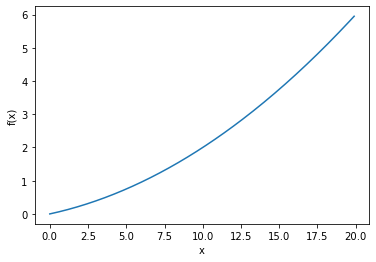

0.1999999999990898
0.2999999999986347


In [60]:
# example
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

## 4.4 기울기

When calculating partial differential equations, we use gradients:

In [63]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # calculate f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # calculate f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val # recover value
        
    return grad

In [77]:
# example
def function_2(x):
    return x[0]**2 + x[1]**2

# getting a gradient in each point
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


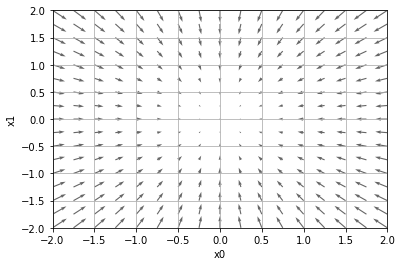

In [69]:
# source code for visualization

from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

위 시각화 그래프에서 기울기가 가리키는 쪽은 각 장소에서 **함수의 출력 값을 가장 줄이는 방향**이다.

경사 하강법은 다음과 같이 나타낼 수 있다.

<div>
<img src="equ4.4.jpg" width="500"/>
</div>

해당 식은 1회 갱신량을 보여주며, 갱신량은 **학습률**이라고 표현한다. 학습률 값은 미리 지정하며, 학습률 값을 변경하면서 학습이 제대로 되고 있는지 확인한다.

In [75]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [68]:
# example
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


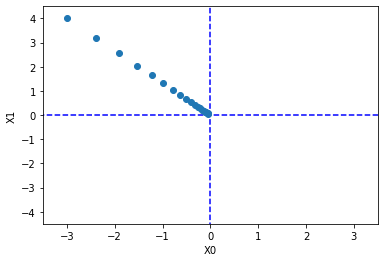

In [73]:
# source code for visualization

from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])

x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률이 너무 크면 값도 크고, 너무 작으면 거의 갱신되지 않는다. 학습률이 극단적인 값이면 다음과 같은 문제가 발생한다.

In [79]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100))

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


신경망에서도 기울기를 구하곤 한다. $2\times3$의 형태를 가지며 가중치가 $W$, 손실 함수가 $L$일 때 경사는 편미분인 $\frac{\partial L}{\partial W}$로 나타낼 수 있다. 각 원소의 편미분을 구하는 것이며, $\frac{\partial L}{\partial W}$ 역시 $W$와 같은 형태를 가진다.

In [80]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.07222616  0.47662636 -0.54885252]
 [ 0.10833923  0.71493955 -0.82327878]]


## 4.5 학습 알고리즘 구현하기

신경망 학습의 절차는 다음과 같다.

1. 미니배치 (미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법[SGD]**라고 불린다.)
2. 기울기 산출
3. 매개변수 갱신
4. 반복

2층 신경망 클래스는 다음과 같이 구현한다.

In [83]:
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측 수행
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # 손실 함수 값 구하기
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    # 정확도 구하기
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    # 가중치 매개변수의 기울기 구하기
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    # 오차역전파법을 사용해 빠르게 기울기 구하기 (다음 챕터에 후술)
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

상기한 미니배치 학습을 활용해보자.

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7733166666666667, 0.7774
train acc, test acc | 0.8764333333333333, 0.8792
train acc, test acc | 0.8994333333333333, 0.902
train acc, test acc | 0.9076833333333333, 0.9103
train acc, test acc | 0.9144666666666666, 0.9181
train acc, test acc | 0.9199666666666667, 0.9224
train acc, test acc | 0.9240666666666667, 0.9265
train acc, test acc | 0.92845, 0.9299
train acc, test acc | 0.9313166666666667, 0.9326
train acc, test acc | 0.9346333333333333, 0.9364
train acc, test acc | 0.9380833333333334, 0.938
train acc, test acc | 0.9400666666666667, 0.939
train acc, test acc | 0.9422333333333334, 0.9412
train acc, test acc | 0.9438166666666666, 0.9438
train acc, test acc | 0.9453333333333334, 0.9441
train acc, test acc | 0.9470166666666666, 0.9445


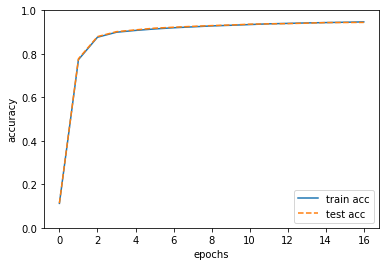

In [85]:
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

에폭이 증가할수록 학습 정확도도 증가했으며, 훈련 데이터와 시험 데이터의 정확도가 거의 일치하므로 오버피팅은 일어나지 않았다.

## Takeaways:

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터에서 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분을 구하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. (다음 장에서 구현하는 다소 복잡한 오차역전파법은 기울기를 고속으로 구할 수 있다.)

# 5. 오차역전파법

상기했듯 수치 미분을 활용해 매개변수의 기울기를 구하는 것은 구현이 쉬우나 시간이 오래 걸린다. **오차역전파법**의 경우, 구현은 보다 복잡하지만 효율적으로 기울기를 구할 수 있다.

역전파는 계산 그래프로 쉽게 시각적으로 나타낼 수 있으며, 국소적 계산에 집중해 복잡한 계산 과정을 보다 간단히 할 수 있다. Chain Rule도 역전파로 사용할 수 있다.

<div>
<img src="fig5.1.jpg" width="500"/>
</div>

<div>
<img src="fig5.2.jpg" width="500"/>
</div>

**덧셈 노드의 역전파**는 다음과 같다. $z = x + y$라고 가정할 때, $\frac{\partial z}{\partial x}=1$, $\frac{\partial z}{\partial y}=1$이 된다. (예제에서는 역전파 때 상류에서 1.3 값이 흘러온다고 가정하자.)

<div>
<img src="fig5.3.jpg" width="500"/>
</div>

<div>
<img src="fig5.4.jpg" width="500"/>
</div>

**곱셈 노드의 역전파**는 다음과 같다. $z = xy$라고 가정할 때, $\frac{\partial z}{\partial x}=y$, $\frac{\partial z}{\partial y}=x$이 된다. (예제에서는 역전파 때 상류에서 1.3 값이 흘러온다고 가정하자.)

<div>
<img src="fig5.5.jpg" width="500"/>
</div>

<div>
<img src="fig5.6.jpg" width="500"/>
</div>

순전파의 입력 신호를 유지해야 곱셈 노드 역전파가 가능하다.

다음 예제를 보자. (옅은 화살표가 순전파, 짙은 화살표가 역전파다.)

<div>
<img src="fig5.7.jpg" width="500"/>
</div>

위 예제에서 얻을 수 있는 결론은 다음과 같다.

- 사과 가격에 대한 지불 금액의 미분 값은 2.2다.
- 사과가 1원 오르면 최종 금액은 2.2원 오른다. ($x$원 오르면 $2.2x$원 오른다.)
- 소비세와 사과 가격이 같은 양만큼 오르면 최종 금액에는 소비세가 200만큼, 사과 가격이 2.2만큼 영향을 준다. (단위가 다르다는 것에 유념. 소비세의 1은 100%, 사과 가격의 1은 1원이다.)

In [86]:
# 곱셈 계층
class MulLayer:
    # x와 y 초기화
    def __init__(self):
        self.x = None
        self.y = None

    # 순전파 처리
    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    # 역전파 처리
    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x

        return dx, dy

# 덧셈 계층
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [88]:
# 사과 예제 구현
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dTax:", dtax)

price: 220
dApple: 2.2
dApple_num: 110
dTax: 200


다음 예제도 구현 가능하다.

<div>
<img src="fig5.8.jpg" width="500"/>
</div>

In [90]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


## 5.5 활성화 함수 계층 구현

ReLU 함수의 경우, 미분 $\frac{\partial y}{\partial x}$는 입력 $x$가 양수일 경우 1, 0 이하일 경우 0을 반환한다. 계산 그래프로 나타내면 다음과 같다.

<div>
<img src="fig5.9.jpg" width="500"/>
</div>

파이썬으로 구현하면 다음과 같다. (mask 변수는 bool type으로, $x\leq0$일 경우 True, $x>0$일 경우 False다.

In [11]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx
    
# mask 작동 원리 확인
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = (x <= 0)
print(x)
print("")
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]

[[False  True]
 [ True False]]


Sigmoid 함수의 경우 곱셈과 덧셈 노드 외에도 exp노드와 나눗셈 노드가 존재한다. 미분하면 입력 값이 $\frac{\partial L}{\partial y}$일 때, 마지막 출력 값은 $\frac{\partial y}{\partial x} y^2 \exp(-x)=\frac{\partial y}{\partial x} y(1-y)$가 된다.

<div>
<img src="fig5.10.jpg" width="500"/>
</div>

다시 말해, 순전파의 출력 y만으로도 sigmoid의 역전파를 계산할 수 있다.

파이썬으로 구현하면 다음과 같다.

In [9]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

행렬의 내적(dot product)을 **어파인 변환**이라고 하며, 어파인 변환을 수행하는 처리는 어파인 계층에서 이뤄진다. 단순 값이 아니라 행렬, 즉 다차원 배열이라는 점에서 계산 그래프를 이해할 때 유념해야 한다.

<div>
<img src="fig5.11.jpg" width="500"/>
</div>

내적에서 유의해야 할 점은 행렬의 형상이다. 예를 들어, $\textbf{X}$의 경우 $\frac{\partial L}{\partial \textbf{X}}$와 형상이 같다. $\textbf{W}$와 $\frac{\partial L}{\partial \textbf{W}}$도 마찬가지다.

입력 데이터를 $N$개로 묶어 순전파하는, 배치용 어파인 계층의 경우 다음과 같다.

<div>
<img src="fig5.12.jpg" width="500"/>
</div>

단순히 편향을 더한다면 $N$개 데이터 전부에 편향이 더해지므로, 역전파를 할 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다. 즉, 단순히 array `B`를 더하는 것이 아니라 배치 2개가 묶인 array `dY`의 편향을 `np.sum(DY, axis=0)`으로 구한다.

In [15]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

이전 장에서 접했던 손글씨 숫자 인식의 계층을 시각화하면 다음과 같다.

<div>
<img src="fig5.13.jpg" width="500"/>
</div>

소프트맥스 계층을 손실 함수인 교차 엔트로피 오차를 포함해 Softmax-with-Loss 계층으로 구현한다. 미분 과정은 복잡하지만 단순 계산의 반복이므로 결과값과 간단화한 계산 그래프를 보자.

<div>
<img src="fig5.14.jpg" width="700"/>
</div>

<div>
<img src="fig5.15.jpg" width="500"/>
</div>

신경망 학습의 목적은 신경망의 출력, 즉 Softmax의 출력이 정답 레이블과 가까워지도록 가중치 매개변수를 조정하는 것이다. 따라서 역전파를 할 때 출력값과 정답의 오차를 앞 계층에 효율적으로 전달해야 하며, 따라서 매우 직관적인 오차를 나타내는 $y_1 - t_1$등의 값이 전달되는 것이다.

In [16]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

## 5.7 오차역전파법 구현

신경망 학습의 절차를 복습해보자.

1. 미니배치
2. 기울기 산출
3. 매개변수 갱신
4. 반복

오차역전파법은 이 중 2단계인 기울기 산출에 해당된다.

오차역전파법을 활용한 2층 신경망 클래스는 다음과 같이 구현한다.

In [98]:
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

앞서 배운 수치 미분과 오차역전파법 모두 기울기를 나타내는 방법이다. 따라서 기울기 산출의 정확성을 위해 두 방법을 각각 사용하고 결과값인 기울기를 서로 비교하는 작업(**기울기 확인**)을 한다.

In [99]:
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.3363130908355303e-10
b1:2.251000127279361e-09
W2:7.427926275595242e-09
b2:1.4094857478663681e-07


기울기 확인 결과, 큰 차이가 없음을 알 수 있다. (유한한 정밀도의 한계 때문에 0이 나오는 경우는 거의 없다.)

오차역전파법을 사용한 학습 또한 구현할 수 있다. 이전 학습 구현과 매우 유사하다.

In [100]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.102 0.1046
0.89955 0.9019
0.9224166666666667 0.9242
0.9346166666666667 0.9313
0.9419833333333333 0.9387
0.95015 0.9469
0.9534 0.9505
0.9586333333333333 0.9566
0.9632666666666667 0.9597
0.9657 0.9626
0.9692833333333334 0.9645
0.9708833333333333 0.9651
0.9735666666666667 0.9683
0.9732666666666666 0.9666
0.9761166666666666 0.9694
0.9779333333333333 0.9715
0.9781 0.9706


## Takeaways:
- 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성된다. 국소적 계산을 조합해 전체 계산을 구성한다.
- 계산 그래프의 순전파는 통상의 계산을 수행한다. 한편, 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다. 이를 **오차역전파법**이라고 한다.
- 수치 미분과 오차역전파법의 결과를 비교하면 구현이 제대로 되었는지 확인할 수 있다. (기울기 확인)

# 6. 학습 관련 기술들

이전에 소개했던 **확률적 경사 하강법 (SGD)**은 기울어진 매개변수 방향으로 계속해서 갱신해 나가는 방법이었다.

수식으로는 다음과 같다. ($\textbf{W}$는 갱신할 가중치 매개변수, $\frac{\partial L}{\partial \textbf{W}}$는 $\textbf{W}$에 대한 손실 함수의 기울기, $\eta$는 학습률, $\leftarrow$는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다. $\eta$는 주로 $0.01$이나 $0.001$의 값을 미리 정해 사용한다.)

<div>
<img src="equ6.1.jpg" width="500"/>
</div>

In [2]:
'''
SGD의 pseudo-code
실제로는 작동하지 않는 의사 코드이나, 설명을 위해 삽입했다.
'''

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

그러나 SGD는 함수에 따라 매우 비효율적일 수 있다. $f(x,y)=\frac{1}{20} x^2 + y^2$가 주어졌을 때, 그래프와 기울기는 다음과 같다.

<div>
<img src="fig6.1.jpg" width="700"/>
</div>

<div>
<img src="fig6.2.jpg" width="500"/>
</div>

이에 SGD를 적용하면 다음 그림과 같이 최적화가 진행된다.

<div>
<img src="fig6.3.jpg" width="500"/>
</div>

방향에 따라 성질이 달라지는 *비등방성* 함수의 경우, SGD의 탐색 경로는 비효율적이다.

**모멘텀** 기법은 수식으로 다음과 같이 나타낼 수 있다. ($\textbf{v}$는 velocity에 해당한다. $\alpha$는 0.9 등의 값을 지닌 상수다.)

<div>
<img src="equ6.2.jpg" width="500"/>
</div>

모멘텀은 기울기 방향으로 힘을 받아 물체가 가속되는 물리 법칙을 나타내며, $\alpha\textbf{v}$는 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다 (마찰, 공기 저항 등).

In [102]:
class Momentum:

    """모멘텀 SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

<div>
<img src="fig6.4.jpg" width="500"/>
</div>

모멘텀은 SGD와 비교했을 때 지그재그의 정도가 덜하며, 이는 x축 방향으로 일정하게 가속할 수 있기 때문에 SGD보다 x축 이동이 더 빠르기 때문이다.

학습률 $\eta$를 최적의 값으로 정하는 기술로 *학습률 감소*가 있다. 학습을 진행하며 큰 학습률을 점차 줄여나가는 방식이다. **AdaGrad**는 각각의 매개변수에 맞춤형 값을 설정한다.

<div>
<img src="equ6.3.jpg" width="500"/>
</div>

$h$는 기존 기울기 값을 제곱하여 계속 더해주는 역할을 한다. ($\odot$는 행렬의 원소별 곱셈을 의미) $\frac{1}{\sqrt{h}}$를 곱해 갱신하는 것은 매개변수의 원소 중에서 크게 갱신된 원소는 학습률이 낮아진다는 것을 뜻한다 (즉 각각의 매개변수의 값이 달라진다).

In [103]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            # 1e-7를 더함으로써 0으로 나누는 에러를 막아준다.

<div>
<img src="fig6.5.jpg" width="500"/>
</div>

그림에서 보이듯 AdaGrad의 경우 효율적으로 움직인다. 상기했듯 처음에는 크게 움직이나, 큰 움직임에 비례해 갱신 정도도 크게 작아졌고 따라서 지그재그의 움직임도 줄어들었다.

물리 법칙을 활용한 모멘텀과 각 매개변수의 움직임에 적응해 그에 따라 갱신 정도를 조정한 AdaGrad를 융합한 것이 **Adam**이다.

In [3]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

<div>
<img src="fig6.6.jpg" width="500"/>
</div>

완벽한 상위호환인 기법은 존재하지 않는다. 풀어야 할 문제가 무엇이냐에 따라서 최적의 기법이 다르다.

In [45]:
# 준비 코드

class MultiLayerNet:
    """완전연결 다층 신경망
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads
    
def smooth_curve(x):
    """손실 함수의 그래프를 매끄럽게 하기 위해 사용
    
    참고：http://glowingpython.blogspot.jp/2012/02/convolution-with-numpy.html
    """
    window_len = 11
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    w = np.kaiser(window_len, 2)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y[5:len(y)-5]

===========iteration:0===========
SGD:2.311662734630048
Momentum:2.3716283018941295
AdaGrad:2.2208593071222156
Adam:2.175024281759965
===========iteration:100===========
SGD:1.6470885490372973
Momentum:0.4470334158923053
AdaGrad:0.2261960696793332
Adam:0.34136444013949907
===========iteration:200===========
SGD:0.8421017626943341
Momentum:0.20239158946078137
AdaGrad:0.10852650299142208
Adam:0.211245656832963
===========iteration:300===========
SGD:0.554013440968788
Momentum:0.1910216859721129
AdaGrad:0.11177511500552675
Adam:0.20789179872367194
===========iteration:400===========
SGD:0.34572559699894534
Momentum:0.1287404996798069
AdaGrad:0.09702678952170066
Adam:0.11772003975231325
===========iteration:500===========
SGD:0.5191554330313176
Momentum:0.21041703257209116
AdaGrad:0.09506820839293917
Adam:0.1389098618269369
===========iteration:600===========
SGD:0.3451116520193199
Momentum:0.13585173874125972
AdaGrad:0.05381503581097388
Adam:0.0646988931778746
===========iteration:700====

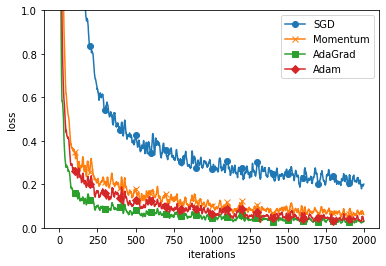

In [110]:
# import os
# import sys
# sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
# import matplotlib.pyplot as plt
# from dataset.mnist import load_mnist
# from common.util import smooth_curve
# from common.multi_layer_net import MultiLayerNet
# from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 6.2 가중치의 초깃값

가중치의 초깃값은 신경망 학습의 성능을 좌우하기도 한다. 오버피팅을 억제해 성능을 높히는 기법으로는 **가중치 감소**가 있다. 가중치 매개변수를 작아지도록 학습해 오버피팅을 방지하는 기법이다. 그러려면 초깃값도 작게 설정하는 것이 대체로 좋으며, 현재까지는 `0.01*np.random.randn(10,100)`을 사용했다.

가중치 초깃값을 0으로 설정하면 비효율적인 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다. (순전파 때 두 번째 층의 뉴런에 같은 값이 전달되며, 결국 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다.) 즉, *초깃값을 무작위로 설정해야 한다.*

가중치의 초깃값은 은닉층 활성화값에 다음과 같은 영향을 미친다 (활성화 함수는 시그모이드, 신경망은 5층을 사용한다).

In [112]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

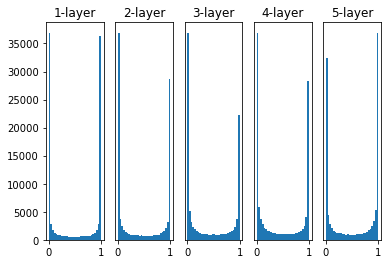

In [113]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

활성화값들이 0과 1에 치우쳐 있으며, 이는 층이 많을수록 더 빈번히 일어나는 현상이다. 시그모이드 함수는 0이나 1에 가까운 값일수록 미분이 0에 가까워지며, 따라서 역전파의 기울기 값이 점점 작아지다가 사라진다. 이를 **기울기 소실** 문제라고 한다.

가중치의 표준편차가 0.01이라면 어떨까?

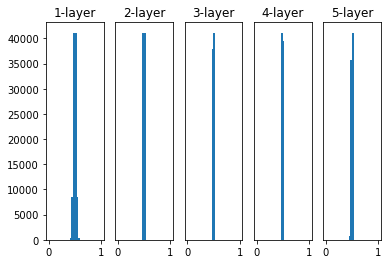

In [114]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 기울기 소실 문제가 없지만, 활성화값들이 0.5로 치우쳐져 있기에 **표현력이 제한**된다. 즉, *다수의 뉴런이 거의 같은 값을 출력하기에 뉴런을 여러 개 둔 의미가 없다*.

새로운 초깃값으로 **Xavier 초깃값**을 설정한다. 이전 층의 노드 수가 $n$개일 때, 초깃값의 표준편차가 $\frac{1}{\sqrt{n}}$의 분포가 되도록 설정한다.

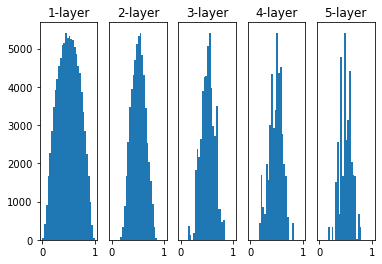

In [115]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

표현력이 제한되지 않고, 기울기 소실 문제도 없는 것을 볼 수 있다. **Xavier 초깃값은 좌우 대칭의 sigmoid 함수와 tanh 함수를 사용할 때 적당하다**. (좌우 대칭이면 중앙 부근이 선형이기 때문)

이번에는 시그모이드 함수 대신 ReLU를 사용할 때 특화된 **He 초깃값**을 알아보자. Xavier 초깃값과 매우 유사하나, 음의 영역이 0이기 때문에 더 넓은 분포를 위해 표준편차가 $\frac{2}{\sqrt{n}}$인 정규분포를 사용한다.

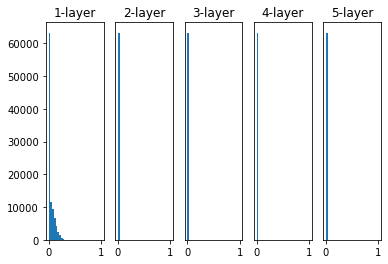

In [118]:
# 0.01일 때

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

ReLU에 표준편차가 0.01인 정규분포를 가중치 초깃값으로 사용했을 때, 각 층의 활성화값들은 매우 작다. 그렇기에 역전파 때 가중치의 기울기 역시 작아지며, 학습의 효과도 미미하다.

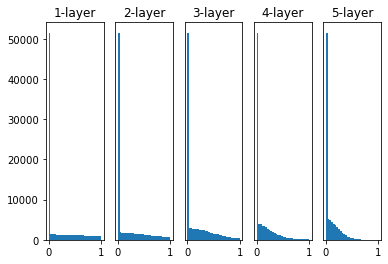

In [119]:
# Xavier 초깃값일 때

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

ReLU에 Xavier 초깃값을 가중치 초깃값으로 사용했을 때, 층이 깊어지면서 치우침이 커진다. 층이 더욱 깊어진다면 치우침이 더 커져서 기울기 소실 문제가 일어난다.

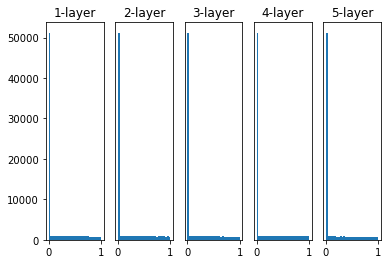

In [120]:
# He 초깃값일 때

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

ReLU에 He 초깃값을 가중치 초깃값으로 사용했을 때, 모든 층에서 균일하게 분포되기에 역전파 때도 적절한 값이 나올 것이다.

**즉, 활성화 함수로 ReLU를 사용할 때는 He 초깃값을, sigmoid나 tanh 등의 S자 모양 곡선일 때는 Xavier 초깃값을 사용한다.**

가중치 초깃값을 비교해보자.

===========iteration:0===========
std=0.01:2.3024469408350017
Xavier:2.3192901818354312
He:2.3313814543549563
===========iteration:100===========
std=0.01:2.301278264986246
Xavier:2.2506253007398183
He:1.4213979231218365
===========iteration:200===========
std=0.01:2.301728825463247
Xavier:2.108312048682505
He:0.9220126167681006
===========iteration:300===========
std=0.01:2.2996518761175513
Xavier:1.8168614451462566
He:0.5343547778912875
===========iteration:400===========
std=0.01:2.3020284423036577
Xavier:1.3421372127967004
He:0.3527625054057355
===========iteration:500===========
std=0.01:2.3051487308538774
Xavier:1.0247786582471803
He:0.3972267643526229
===========iteration:600===========
std=0.01:2.3024236709985333
Xavier:0.7165472399511349
He:0.3736940062512244
===========iteration:700===========
std=0.01:2.3009796595597707
Xavier:0.5227898275847741
He:0.2687048344487937
===========iteration:800===========
std=0.01:2.3001116592232056
Xavier:0.5222204206811707
He:0.33245429119234

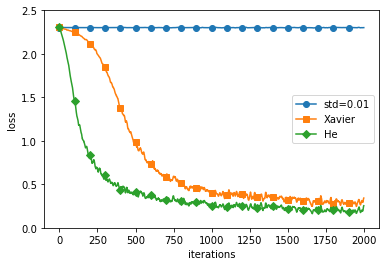

In [122]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

`std=0.01`의 경우 학습이 전혀 이뤄지지 않으며, 나머지 두 개의 초깃값의 경우 학습이 잘 이뤄진다. 진도는 He 초깃값 쪽이 조금 더 빠르다.

## 6.3 배치 정규화

**배치 정규화**는 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것이다. 다음과 같은 이점이 있다.

1. 학습을 빨리 진행할 수 있다 (속도 개선).
2. 초깃값에 크게 의존하지 않는다.
3. 오버피팅을 억제한다 (드롭아웃 등의 필요성 감소).

<div>
<img src="fig6.7.jpg" width="700"/>
</div>

배치 정규화는 그림처럼 학습 시 미니배치를 단위로 정규화($N\sim(0,1)$)한다.

수식으로는 아래와 같이 표현한다.

<div>
<img src="equ6.4.jpg" width="500"/>
</div>

미니배치 $B={x_1, x_2, ..., x_m}$는 $m$개의 입력 데이터의 집합이며, 이에 대한 평균 $\mu_B$와 분산 $\sigma^2_B$를 구한 후 $N\sim(0,1)$으로 정규화한다. $\epsilon$은 division by 0 error를 막기 위한 작은 수 (`10e-7`, etc.)다.

또한, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동 변환을 수행한다.

<div>
<img src="equ6.5.jpg" width="300"/>
</div>

$\gamma$가 확대를, $\beta$가 이동을 담당한다. 초깃값은 $\gamma=1, \beta=0$이다.

계산 그래프는 다음과 같이 나타낸다.

<div>
<img src="fig6.8.jpg" width="700"/>
</div>

In [38]:
# 준비 코드
class MultiLayerNetExtend:
    """완전 연결 다층 신경망(확장판)
    가중치 감소, 드롭아웃, 배치 정규화 구현
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    use_dropout : 드롭아웃 사용 여부
    dropout_ration : 드롭아웃 비율
    use_batchNorm : 배치 정규화 사용 여부
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
            
            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

    
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

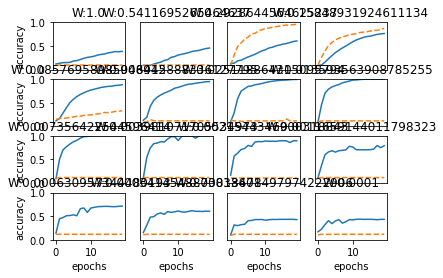

In [56]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
#             print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
#     print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
#     plt.legend(loc='lower right')
    
plt.show()

초깃값 분포를 다양하게 시험해 봤을 떄, 배치 정규화를 사용했을 때 학습 진도가 빠른 것으로 나타난다. 배치 정규화를 이용하지 않으면 학습이 전혀 진행되지 않는 case도 존재한다.

**배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않는다**.

## 6.4 오버피팅 방지

매개변수가 많고 표현력이 높은 모델을 다루거나 적은 훈련 데이터를 가졌을 때 오버피팅이 자주 발생한다.

오버피팅을 방지하는 방법은 크게 두 가지가 있는데, 그 중 하나는 **가중치 감소**다. 큰 가중치에 대해서 그에 맞는 큰 페널티를 부과해 오버피팅을 억제하는 방법이다.

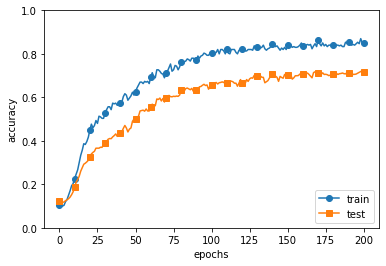

In [54]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

#         print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

L2 정규화를 사용했다. 가중치 감소를 통해 모든 가중치 각각의 손실 함수에 $\frac{1}{2}\lambda\textbf{W}^2$를 더했다. (따라서, 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 $\lambda\textbf{W}$를 더한다.) $\lambda$ 값이 커질수록 손실 함수에 더하는 값도 커지기 때문에 큰 가중치에 대한 페널티도 커진다. 위 코드에서는 $\lambda=0.1$을 적용했다.

오버피팅을 방지하는 또다른 방법은 **드롭아웃**이다. 가중치 감소의 경우, 신경망 모델이 복잡해질 경우 오버피팅을 완벽히 억제하지는 못한다. 드롭아웃은 훈련 때 임의로 은닉층의 뉴런을 무작위로 골라 삭제한다. 뉴런이 삭제되면 신호를 전달하지 않는다. 다만, 시험 때는 삭제하지 않고 모든 뉴런에 신호를 보내며, 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱하여 출력한다.

<div>
<img src="fig6.9.jpg" width="700"/>
</div>

In [48]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_flg=True):
        if train_flg:
            # 삭제하면 False로 표시
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        # 순전파 때 통과시키지 않은 뉴런은 역전차 때도 신호 차단
        return dout * self.mask

train loss:2.3186823827943512
=== epoch:1, train acc:0.15333333333333332, test acc:0.1366 ===
train loss:2.331023868554309
train loss:2.317613907175263
train loss:2.3149365357357867
=== epoch:2, train acc:0.15333333333333332, test acc:0.1397 ===
train loss:2.333955338431596
train loss:2.3301109462366343
train loss:2.3290281203840935
=== epoch:3, train acc:0.15666666666666668, test acc:0.1391 ===
train loss:2.3363180118890665
train loss:2.3195725507641898
train loss:2.3193529913160726
=== epoch:4, train acc:0.16, test acc:0.1416 ===
train loss:2.3034800233229715
train loss:2.3236030815553925
train loss:2.323860586552898
=== epoch:5, train acc:0.15333333333333332, test acc:0.1428 ===
train loss:2.3200373652459074
train loss:2.3003637562594474
train loss:2.3225059504434875
=== epoch:6, train acc:0.15333333333333332, test acc:0.1426 ===
train loss:2.3101043229278146
train loss:2.3105502109733798
train loss:2.2977789475788755
=== epoch:7, train acc:0.15333333333333332, test acc:0.1408 ===
t

train loss:2.2705433841373908
train loss:2.265974280676176
train loss:2.24448978247407
=== epoch:57, train acc:0.23, test acc:0.1968 ===
train loss:2.255019356892162
train loss:2.2398249825652945
train loss:2.256582352379029
=== epoch:58, train acc:0.23333333333333334, test acc:0.1976 ===
train loss:2.2734037275679237
train loss:2.261561914556548
train loss:2.2516835012776704
=== epoch:59, train acc:0.23666666666666666, test acc:0.199 ===
train loss:2.2437651389545237
train loss:2.24724829134536
train loss:2.259098922888323
=== epoch:60, train acc:0.23666666666666666, test acc:0.199 ===
train loss:2.2522967009426993
train loss:2.245267154188129
train loss:2.2395807618657293
=== epoch:61, train acc:0.23666666666666666, test acc:0.1998 ===
train loss:2.2337059336585527
train loss:2.2312131407070406
train loss:2.254669835079854
=== epoch:62, train acc:0.24, test acc:0.2015 ===
train loss:2.242652268432237
train loss:2.264192820363621
train loss:2.256266992930157
=== epoch:63, train acc:0.

=== epoch:112, train acc:0.29333333333333333, test acc:0.2423 ===
train loss:2.205372460318065
train loss:2.1998726245922278
train loss:2.1728929285539866
=== epoch:113, train acc:0.2966666666666667, test acc:0.2437 ===
train loss:2.1824491021775025
train loss:2.187366444482012
train loss:2.1909862118812757
=== epoch:114, train acc:0.2966666666666667, test acc:0.2454 ===
train loss:2.1676083884443123
train loss:2.179415722310384
train loss:2.209681324864432
=== epoch:115, train acc:0.2966666666666667, test acc:0.2461 ===
train loss:2.169575958240136
train loss:2.20261870061036
train loss:2.1497142002357204
=== epoch:116, train acc:0.30333333333333334, test acc:0.2518 ===
train loss:2.1845957441639494
train loss:2.1696457233885655
train loss:2.169570831360298
=== epoch:117, train acc:0.3, test acc:0.2546 ===
train loss:2.212292053805221
train loss:2.1754893372371287
train loss:2.1575529327702427
=== epoch:118, train acc:0.30333333333333334, test acc:0.2565 ===
train loss:2.1681107072069

train loss:2.026818977473867
=== epoch:167, train acc:0.34, test acc:0.2955 ===
train loss:2.0561660331267797
train loss:1.9439744367501663
train loss:2.0152187912150445
=== epoch:168, train acc:0.3466666666666667, test acc:0.2991 ===
train loss:1.9829813075281677
train loss:1.9448603713496158
train loss:1.9747006613142748
=== epoch:169, train acc:0.35, test acc:0.3003 ===
train loss:2.076779197866424
train loss:2.0654355791549652
train loss:2.0134482928247026
=== epoch:170, train acc:0.3566666666666667, test acc:0.303 ===
train loss:1.9068823018407275
train loss:1.9741130178479809
train loss:1.9192955913976035
=== epoch:171, train acc:0.35333333333333333, test acc:0.3007 ===
train loss:1.9894310908405513
train loss:2.0032796643265662
train loss:1.9760625163483911
=== epoch:172, train acc:0.37, test acc:0.3049 ===
train loss:1.9139629288685085
train loss:1.9628602257619654
train loss:1.9655975764596716
=== epoch:173, train acc:0.37666666666666665, test acc:0.3045 ===
train loss:2.04492

=== epoch:223, train acc:0.48333333333333334, test acc:0.388 ===
train loss:1.7942209719651427
train loss:1.6591163419941999
train loss:1.6643018116134893
=== epoch:224, train acc:0.48333333333333334, test acc:0.3894 ===
train loss:1.8785339377545358
train loss:1.7361305126955917
train loss:1.6128810125700224
=== epoch:225, train acc:0.49, test acc:0.3919 ===
train loss:1.6896279727233177
train loss:1.7523451586433467
train loss:1.5841379132991875
=== epoch:226, train acc:0.5, test acc:0.3952 ===
train loss:1.7541809799220727
train loss:1.65158311792135
train loss:1.7549674989373143
=== epoch:227, train acc:0.49666666666666665, test acc:0.3968 ===
train loss:1.6790895248838473
train loss:1.7670325903669484
train loss:1.8411358126802606
=== epoch:228, train acc:0.5, test acc:0.3984 ===
train loss:1.6472668614964703
train loss:1.6568541766513993
train loss:1.7738508335841816
=== epoch:229, train acc:0.5066666666666667, test acc:0.4007 ===
train loss:1.6923660739106299
train loss:1.586438

=== epoch:279, train acc:0.65, test acc:0.5026 ===
train loss:1.4204865402234605
train loss:1.6027278046218771
train loss:1.2375019287343665
=== epoch:280, train acc:0.6533333333333333, test acc:0.5049 ===
train loss:1.4675085582228704
train loss:1.5411628047349293
train loss:1.5417513965834733
=== epoch:281, train acc:0.6566666666666666, test acc:0.504 ===
train loss:1.4495924829796882
train loss:1.3460746360336315
train loss:1.5308729321223087
=== epoch:282, train acc:0.6533333333333333, test acc:0.5034 ===
train loss:1.4140564743318325
train loss:1.564520236371426
train loss:1.4681842111501568
=== epoch:283, train acc:0.66, test acc:0.5077 ===
train loss:1.2426779183055339
train loss:1.4591189865284997
train loss:1.5427747456145522
=== epoch:284, train acc:0.6566666666666666, test acc:0.5074 ===
train loss:1.498644889123066
train loss:1.4322196478462226
train loss:1.248341641206006
=== epoch:285, train acc:0.6566666666666666, test acc:0.5052 ===
train loss:1.4100077662665733
train l

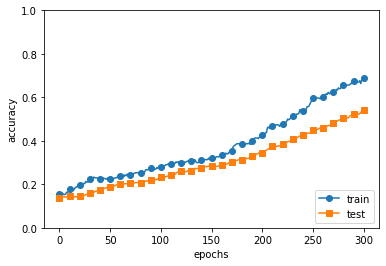

In [49]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 통해서도 오버피팅을 억제한 것을 볼 수 있다.

## 6.5 하이퍼파라미터 최적화

신경망의 대표적 하이퍼파라미터는 각 층의 뉴런 개수, 배치 크기, 매개변수 갱신 시의 학습률, 가중치 감소 등이 있다.

하이퍼파라미터 오버피팅을 방지하기 위해 검증 데이터를 사용한다.

In [51]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.
    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

# shuffle train data
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20% as validation set
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

하이퍼파라미터 최적화의 원리는 **최적 값이 존재하는 범위를 조금씩 줄여가는 것**이다. 대략적인 범위를 설정해 무작위로 샘플링한 값으로 정확도를 평가하며 반복한다. 범위는 주로 로그 스케일(10의 n승 범위)로 설정한다.

딥러닝 시 하이퍼파라미터 최적화는 매우 오랜 시간이 걸리므로 학습을 위한 에폭을 작게 설정해 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.

1. 하이퍼파라미터 값의 범위 설정
2. 범위 내 하이퍼파라미터 값 무작위 추출
3. 샘플링한 값을 사용해 학습 후 검증 데이터로 정확도 평가 (에폭은 작게)
4. 2-3단계를 특정 횟수(100회, etc.)동안 반복해 범위 좁게 갱신

하이퍼파라미터의 최초 범위는 주로 $[0.001, 1,000]$, 다시 말해 $[10^{-3}, 10^3]$으로 설정해 계산한다. 가중치 감소 계수와 학습률을 조정할 때는 다음과 같이 구현한다.

In [53]:
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

위 경우는 가중치 감소 계수를 $[10^{-8}, 10^{-4}]$, 학습률을 $[10^{-6}, 10^{-2}]$로 설정했다.

여러 값을 테스트하면 다음과 같은 결과를 볼 수 있다.

<div>
<img src="fig6.10.jpg" width="700"/>
</div>

<div>
<img src="fig6.11.jpg" width="500"/>
</div>

학습이 잘 진행될 때의 학습률은 $0.001\sim0.01$, 가중치 감소 계수는 $10^{-8}\sim10^{-6}$ 정도임을 알 수 있다. 이를 반복해 하이퍼파라미터의 범위를 더욱 줄여 나간다.

## Takeaways:

- 매개변수 갱신 방법에는 SGD 외에도 모멘텀, AdaGrad, Adam 등이 있다.
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다.
- 가중치의 초깃값으로는 Xavier 초깃값과 He 초깃값이 효과적이다.
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며, 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.